In [27]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [19]:
# Filenames for each set of data
acc_files = {
    'laying_down': ['data/Laying1/Accelerometer.csv', 'data/Laying2/Accelerometer.csv', 'data/Laying3/Accelerometer.csv'],
    'standing_up': ['data/Stand1/Accelerometer.csv', 'data/Stand2/Accelerometer.csv', 'data/Stand3/Accelerometer.csv'],
    'moving_circle': ['data/Cycle1/Accelerometer.csv', 'data/Cycle2/Accelerometer.csv', 'data/Cycle3/Accelerometer.csv']
}

gyro_files = {
    'laying_down': ['data/Laying1/Gyroscope.csv', 'data/Laying2/Gyroscope.csv', 'data/Laying3/Gyroscope.csv'],
    'standing_up': ['data/Stand1/Gyroscope.csv', 'data/Stand2/Gyroscope.csv', 'data/Stand3/Gyroscope.csv'],
    'moving_circle': ['data/Cycle1/Gyroscope.csv', 'data/Cycle2/Gyroscope.csv', 'data/Cycle3/Gyroscope.csv']
}

# Create empty lists to hold the dataframes
acc_dataframes = []
gyro_dataframes = []

# Load accelerometer data
for position, files in acc_files.items():
    for file in files:
        df = pd.read_csv(file, usecols=[1, 2, 3], names=['ax', 'ay', 'az'], skiprows=[0])
        df['class'] = position  # Label the data with the position (class)
        acc_dataframes.append(df)

# Load gyroscope data
for position, files in gyro_files.items():
    for file in files:
        df = pd.read_csv(file, usecols=[1, 2, 3], names=['gx', 'gy', 'gz'], skiprows=[0])
        df['class'] = position  # Label the data with the position (class)
        gyro_dataframes.append(df)


In [20]:
# Combine all accelerometer data
combined_acc_data = pd.concat(acc_dataframes, ignore_index=True)

# Combine all gyroscope data
combined_gyro_data = pd.concat(gyro_dataframes, ignore_index=True)


In [39]:
combined_acc_data.head(4700)

ax        ay        az        class
0     0.316143  0.470921  9.717941  laying_down
1     0.300276  0.470023  9.721235  laying_down
2     0.313897  0.461490  9.713151  laying_down
3     0.308808  0.460293  9.734407  laying_down
4     0.306263  0.465831  9.726773  laying_down
...        ...       ...       ...          ...
4695  0.008981  9.802366  0.015119  standing_up
4696  0.030836  9.805060  0.025297  standing_up
4697  0.039069  9.802965  0.012574  standing_up
4698  0.025447  9.806557 -0.005089  standing_up
4699  0.023950  9.808353 -0.013322  standing_up

[4700 rows x 4 columns]

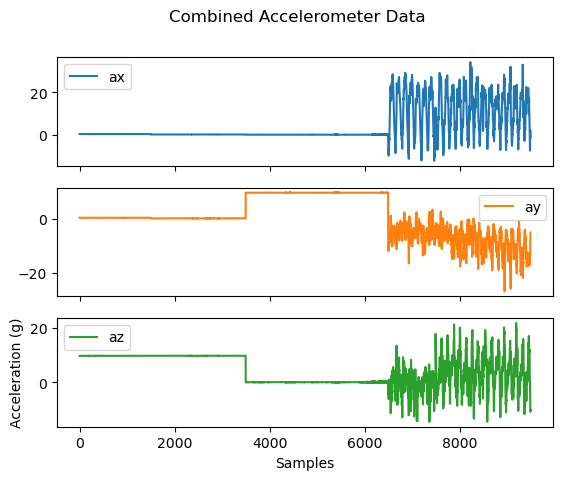

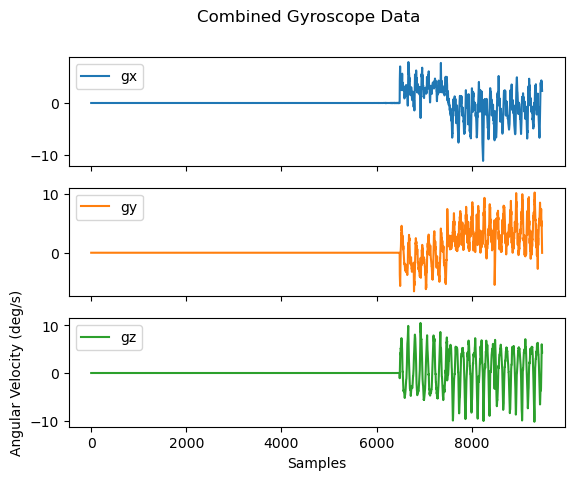

In [26]:

# Plot combined accelerometer data
combined_acc_data.plot(subplots=True, title="Combined Accelerometer Data")
plt.xlabel("Samples")
plt.ylabel("Acceleration (g)")
plt.show()

# Plot combined gyroscope data
combined_gyro_data.plot(subplots=True, title="Combined Gyroscope Data")
plt.xlabel("Samples")
plt.ylabel("Angular Velocity (deg/s)")
plt.show()


In [22]:
# Save combined accelerometer and gyroscope data
combined_acc_data.to_pickle('combined_accelerometer_data.pkl')
combined_gyro_data.to_pickle('combined_gyroscope_data.pkl')


In [23]:
# Split accelerometer data into training and test sets
train_acc_data = combined_acc_data.iloc[:int(len(combined_acc_data) * 2/3)]
test_acc_data = combined_acc_data.iloc[int(len(combined_acc_data) * 2/3):]

# Split gyroscope data into training and test sets
train_gyro_data = combined_gyro_data.iloc[:int(len(combined_gyro_data) * 2/3)]
test_gyro_data = combined_gyro_data.iloc[int(len(combined_gyro_data) * 2/3):]

# Save the splits as pickle files
train_acc_data.to_pickle('train_acc_data.pkl')
test_acc_data.to_pickle('test_acc_data.pkl')

train_gyro_data.to_pickle('train_gyro_data.pkl')
test_gyro_data.to_pickle('test_gyro_data.pkl')
